<a href="https://colab.research.google.com/github/leesh1005/mining2022/blob/main/221202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 스토어 랭킹에 영향을 미치는 요소

## 8조

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
google = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Google-Playstore.csv")
display(google.head())

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
gps = google
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


https://zephyrus1111.tistory.com/44

In [15]:
#gps.drop(columns='Scraped Time', inplace=True)
gps = gps.drop('Scraped Time', axis=1)
gps = gps.drop('Developer Id', axis=1)
gps = gps.drop('Developer Website', axis=1)
gps = gps.drop('Developer Email', axis=1)
gps = gps.drop('Privacy Policy', axis=1)
gps = gps.dropna(subset=['App Name'],axis=0)
gps = gps.dropna(subset=['Currency'],axis=0)
gps = gps.dropna(subset=['Size'],axis=0)
gps = gps.dropna(subset=['Installs'],axis=0)
gps = gps.dropna(subset=['Released'],axis=0)

In [16]:
gps.loc[gps['Rating'] != gps['Rating'], 'Rating'] = 0
gps.loc[gps['Rating Count'] != gps['Rating Count'], 'Rating Count'] = 0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [18]:
gps.loc[gps['Minimum Android'] != gps['Minimum Android'], 'Minimum Android'] = "4.1 and up"

In [20]:
gps["Released"]=gps["Released"].apply(str)
gps["Last Updated"]=gps["Last Updated"].apply(str)

In [21]:
gps['Size'] = gps['Size'].map(lambda x:x[:-1])

gps['Released'] = gps['Released'].map(lambda x:x[-4:])
gps['Last Updated'] = gps['Last Updated'].map(lambda x:x[-4:])

In [22]:
gps = gps.astype({'Released':int, 'Last Updated':int})

In [23]:
gps['Update'] = gps['Last Updated']-gps['Released']

In [24]:
gps.loc[(gps['Update'] <= 0), 'Update'] = 0
gps.loc[(gps['Update'] > 0), 'Update'] = 1

display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,2020,2020,Everyone,False,False,False,0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,2020,2021,Everyone,True,False,False,1
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,2019,2019,Everyone,False,False,False,0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,2018,2018,Everyone,True,False,False,0
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,2020,2018,Everyone,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10M,4.1 and up,2018,2018,Everyone,True,False,False,0
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,2018,2018,Everyone,False,False,False,0
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,2018,2018,Everyone,False,False,False,0
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,2016,2021,Everyone,True,False,False,1


In [25]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241856 entries, 0 to 2312943
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          object 
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              bool   
 9   Price             float64
 10  Currency          object 
 11  Size              object 
 12  Minimum Android   object 
 13  Released          int64  
 14  Last Updated      int64  
 15  Content Rating    object 
 16  Ad Supported      bool   
 17  In App Purchases  bool   
 18  Editors Choice    bool   
 19  Update            int64  
dtypes: bool(4), float64(4), int64(4), object(8)
memory usage: 299.3+ MB


In [26]:
gps.loc[gps['Size'] == "Varies with device", 'Size'] = "00"

In [27]:
gps["Size"] = gps["Size"].apply(str)

In [28]:
gps['unit'] = gps['Size'].map(lambda x:x[-1:])

In [29]:
unit_count = gps['unit'].value_counts()
print(unit_count) 

M    2155313
0      51245
k      35286
G         12
Name: unit, dtype: int64


In [30]:
gps.loc[(gps['unit'] == 'M'), 'unit'] = 1000
gps.loc[(gps['unit'] == 'G'), 'unit'] = 1000000
gps.loc[(gps['unit'] == 'k'), 'unit'] = 1
gps.loc[(gps['unit'] == '0'), 'unit'] = 0

In [31]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,2020,2020,Everyone,False,False,False,0,1000
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,2020,2021,Everyone,True,False,False,1,1000
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,2019,2019,Everyone,False,False,False,0,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,2018,2018,Everyone,True,False,False,0,1000
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,2020,2018,Everyone,False,False,False,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10M,4.1 and up,2018,2018,Everyone,True,False,False,0,1000
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,2018,2018,Everyone,False,False,False,0,1000
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,2018,2018,Everyone,False,False,False,0,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,2016,2021,Everyone,True,False,False,1,1000


In [32]:
gps['Size'] = gps['Size'].map(lambda x:x[:-1])
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10,7.1 and up,2020,2020,Everyone,False,False,False,0,1000
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9,5.0 and up,2020,2021,Everyone,True,False,False,1,1000
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7,4.0.3 and up,2019,2019,Everyone,False,False,False,0,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8,4.0.3 and up,2018,2018,Everyone,True,False,False,0,1000
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2,4.1 and up,2020,2018,Everyone,False,False,False,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10,4.1 and up,2018,2018,Everyone,True,False,False,0,1000
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44,4.1 and up,2018,2018,Everyone,False,False,False,0,1000
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29,5.0 and up,2018,2018,Everyone,False,False,False,0,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10,5.0 and up,2016,2021,Everyone,True,False,False,1,1000


In [33]:
gps.replace({'Size': {',': ''}})

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10,7.1 and up,2020,2020,Everyone,False,False,False,0,1000
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9,5.0 and up,2020,2021,Everyone,True,False,False,1,1000
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7,4.0.3 and up,2019,2019,Everyone,False,False,False,0,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8,4.0.3 and up,2018,2018,Everyone,True,False,False,0,1000
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2,4.1 and up,2020,2018,Everyone,False,False,False,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10,4.1 and up,2018,2018,Everyone,True,False,False,0,1000
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44,4.1 and up,2018,2018,Everyone,False,False,False,0,1000
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29,5.0 and up,2018,2018,Everyone,False,False,False,0,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10,5.0 and up,2016,2021,Everyone,True,False,False,1,1000


In [34]:
gps['Size'] = gps['Size'].str.replace(',', '') ## 데이터, -> 소프트웨어

In [35]:
gps = gps.astype({'Size':float, 'unit':int})

In [36]:
gps['k_Size'] = gps['Size']*gps['unit']

In [37]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit,k_Size
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10.0,7.1 and up,2020,2020,Everyone,False,False,False,0,1000,10000.0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9,5.0 and up,2020,2021,Everyone,True,False,False,1,1000,2900.0
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7,4.0.3 and up,2019,2019,Everyone,False,False,False,0,1000,3700.0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8,4.0.3 and up,2018,2018,Everyone,True,False,False,0,1000,1800.0
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2,4.1 and up,2020,2018,Everyone,False,False,False,0,1000,6200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,10.0,4.1 and up,2018,2018,Everyone,True,False,False,0,1000,10000.0
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44.0,4.1 and up,2018,2018,Everyone,False,False,False,0,1000,44000.0
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29.0,5.0 and up,2018,2018,Everyone,False,False,False,0,1000,29000.0
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10.0,5.0 and up,2016,2021,Everyone,True,False,False,1,1000,10000.0


In [38]:
gps['k_Size'].unique()

array([1.00e+04, 2.90e+03, 3.70e+03, ..., 4.05e+05, 3.20e+00, 5.12e+05])

In [39]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241856 entries, 0 to 2312943
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          object 
 6   Minimum Installs  float64
 7   Maximum Installs  int64  
 8   Free              bool   
 9   Price             float64
 10  Currency          object 
 11  Size              float64
 12  Minimum Android   object 
 13  Released          int64  
 14  Last Updated      int64  
 15  Content Rating    object 
 16  Ad Supported      bool   
 17  In App Purchases  bool   
 18  Editors Choice    bool   
 19  Update            int64  
 20  unit              int64  
 21  k_Size            float64
dtypes: bool(4), float64(6), int64(5), object(7)
memory usage: 333.5+ MB


In [40]:
sns.set_style("whitegrid")

In [41]:
gps=gps.replace({'Free':True, 'In App Purchases':True, 'Editors Choice':True},1)
gps=gps.replace({'Free':False, 'In App Purchases':False, 'Editors Choice':False},0)

In [42]:
gps=gps.drop('Installs', axis=1)

In [43]:
gps['Ranking'] = google['Maximum Installs'].rank(ascending = False).astype('int')

In [44]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit,k_Size,Ranking
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,1,0.0,USD,10.0,7.1 and up,2020,2020,Everyone,False,0,0,0,1000,10000.0,2096419
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,1,0.0,USD,2.9,5.0 and up,2020,2021,Everyone,True,0,0,1,1000,2900.0,569929
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,1,0.0,USD,3.7,4.0.3 and up,2019,2019,Everyone,False,0,0,0,1000,3700.0,1824902
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,1,0.0,USD,1.8,4.0.3 and up,2018,2018,Everyone,True,0,0,0,1000,1800.0,2056521
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,1,0.0,USD,6.2,4.1 and up,2020,2018,Everyone,False,0,0,0,1000,6200.0,1260017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,1,0.0,USD,10.0,4.1 and up,2018,2018,Everyone,True,0,0,0,1000,10000.0,879661
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,1,0.0,USD,44.0,4.1 and up,2018,2018,Everyone,False,0,0,0,1000,44000.0,1289527
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,1,0.0,USD,29.0,5.0 and up,2018,2018,Everyone,False,0,0,0,1000,29000.0,1499897
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,1,0.0,USD,10.0,5.0 and up,2016,2021,Everyone,True,0,0,1,1000,10000.0,809000


In [45]:
gps.sort_values('Maximum Installs', ascending = False).head(30)

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit,k_Size,Ranking
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,1.000000e+10,12057627016,1,0.0,USD,0.0,Varies with device,2012,2021,Everyone,False,0,0,1,0,0.0,1
881403,YouTube,com.google.android.youtube,Video Players & Editors,4.4,112440547.0,5.000000e+09,9766230924,1,0.0,USD,0.0,Varies with device,2010,2021,Teen,True,0,0,1,0,0.0,2
1773294,Google,com.google.android.googlequicksearchbox,Tools,4.2,19798962.0,5.000000e+09,9154248491,1,0.0,USD,0.0,Varies with device,2010,2021,Everyone,True,0,0,1,0,0.0,3
1060335,Google Text-to-Speech,com.google.android.tts,Tools,4.1,254700.0,5.000000e+09,9034404884,1,0.0,USD,0.0,Varies with device,2013,2021,Everyone,False,0,0,1,0,0.0,5
944254,Google Chrome: Fast & Secure,com.android.chrome,Communication,4.1,31481796.0,5.000000e+09,8925640788,1,0.0,USD,0.0,Varies with device,2012,2021,Everyone,False,0,0,1,0,0.0,6
2099458,Gmail,com.google.android.gm,Communication,4.2,9488421.0,5.000000e+09,8756574289,1,0.0,USD,0.0,Varies with device,2010,2021,Everyone,True,0,0,1,0,0.0,7
893676,Google Drive,com.google.android.apps.docs,Productivity,4.3,639307.0,5.000000e+09,7028265259,1,0.0,USD,0.0,Varies with device,2011,2021,Everyone,False,1,0,1,0,0.0,9
385470,WhatsApp Messenger,com.whatsapp,Communication,4.0,138557570.0,5.000000e+09,6265637751,1,0.0,USD,0.0,Varies with device,2010,2021,Everyone,False,0,1,1,0,0.0,11
167781,Google TV (previously Play Movies & TV),com.google.android.videos,Video Players & Editors,4.0,1825673.0,5.000000e+09,6156518915,1,0.0,USD,0.0,Varies with device,2011,2021,Teen,False,0,0,1,0,0.0,12
1830962,Google Photos,com.google.android.apps.photos,Photography,4.5,35369236.0,5.000000e+09,5754179589,1,0.0,USD,0.0,Varies with device,2015,2021,Everyone,False,0,0,1,0,0.0,13


In [46]:
gps=gps.replace({'Ad Supported':0},False)
gps=gps.replace({'Ad Supported':1},True)

랭킹에 영향 -> Ad Supported 1-0 이진으로 영향 미치는 요인

#1130 이상화

In [47]:
#Minimum Android  전처리
gps["Minimum Android"]=gps["Minimum Android"].apply(str)
gps.loc[gps['Minimum Android'] == "Varies with device", 'Minimum Android'] = "00"

In [48]:
gps['Minimum Android'] = gps['Minimum Android'].map(lambda x:x[:1])

In [49]:
gps['Minimum Android'].unique()

array(['7', '5', '4', '6', '2', '1', '3', '8', '0'], dtype=object)

In [50]:
gps.loc[gps['Minimum Android'] == "0", 'Minimum Android'] = "00"

In [51]:
gps['Minimum Android'].unique()

array(['7', '5', '4', '6', '2', '1', '3', '8', '00'], dtype=object)

In [52]:
gps["Minimum Android"]=gps["Minimum Android"].apply(int)

In [53]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit,k_Size,Ranking
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,1,0.0,USD,10.0,7,2020,2020,Everyone,False,0,0,0,1000,10000.0,2096419
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,1,0.0,USD,2.9,5,2020,2021,Everyone,True,0,0,1,1000,2900.0,569929
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,1,0.0,USD,3.7,4,2019,2019,Everyone,False,0,0,0,1000,3700.0,1824902
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,1,0.0,USD,1.8,4,2018,2018,Everyone,True,0,0,0,1000,1800.0,2056521
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,1,0.0,USD,6.2,4,2020,2018,Everyone,False,0,0,0,1000,6200.0,1260017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,1,0.0,USD,10.0,4,2018,2018,Everyone,True,0,0,0,1000,10000.0,879661
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,1,0.0,USD,44.0,4,2018,2018,Everyone,False,0,0,0,1000,44000.0,1289527
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,1,0.0,USD,29.0,5,2018,2018,Everyone,False,0,0,0,1000,29000.0,1499897
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,1,0.0,USD,10.0,5,2016,2021,Everyone,True,0,0,1,1000,10000.0,809000


In [54]:
#k_size로 사이즈 통일했으니 size, unit 칼럼 삭제
gps=gps.drop('Size', axis=1)
gps=gps.drop('unit', axis=1)

In [55]:
gps['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [56]:
gps['Currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'SGD', 'AUD', 'ZAR'], dtype=object)

In [57]:
gps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [58]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,k_Size,Ranking
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,1,0.0,USD,7,2020,2020,Everyone,False,0,0,0,10000.0,2096419
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,1,0.0,USD,5,2020,2021,Everyone,True,0,0,1,2900.0,569929
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,1,0.0,USD,4,2019,2019,Everyone,False,0,0,0,3700.0,1824902
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,1,0.0,USD,4,2018,2018,Everyone,True,0,0,0,1800.0,2056521
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,1,0.0,USD,4,2020,2018,Everyone,False,0,0,0,6200.0,1260017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,1,0.0,USD,4,2018,2018,Everyone,True,0,0,0,10000.0,879661
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,1,0.0,USD,4,2018,2018,Everyone,False,0,0,0,44000.0,1289527
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,1,0.0,USD,5,2018,2018,Everyone,False,0,0,0,29000.0,1499897
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,1,0.0,USD,5,2016,2021,Everyone,True,0,0,1,10000.0,809000


In [59]:
#레이블 인코딩
encoding_columns=['Category', 'Currency', 'Content Rating']
not_encoding_columns=['App Name','App Id','Rating',	'Rating Count',	'Minimum Installs'	,'Maximum Installs','Free','Price','Size'	,'Minimum Android	Released','Last Updated','Ad Supported'	,'In App Purchases',	'Editors Choice',	'Update','unit''k_Size', 'Ranking']

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
for ecolumn in encoding_columns:
  labels=[]
  encoder = LabelEncoder()
  items=list(gps[ecolumn])
  encoder.fit(items)
  labels=encoder.transform(items)
  gps[ecolumn]=labels

gps.head()

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,k_Size,Ranking
0,Gakondo,com.ishakwe.gakondo,1,0.0,0.0,10.0,15,1,0.0,9,7,2020,2020,1,False,0,0,0,10000.0,2096419
1,Ampere Battery Info,com.webserveis.batteryinfo,42,4.4,64.0,5000.0,7662,1,0.0,9,5,2020,2021,1,True,0,0,1,2900.0,569929
2,Vibook,com.doantiepvien.crm,33,0.0,0.0,50.0,58,1,0.0,9,4,2019,2019,1,False,0,0,0,3700.0,1824902
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,13,5.0,5.0,10.0,19,1,0.0,9,4,2018,2018,1,True,0,0,0,1800.0,2056521
4,GROW.me,com.horodyski.grower,42,0.0,0.0,100.0,478,1,0.0,9,4,2020,2018,1,False,0,0,0,6200.0,1260017


In [62]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,k_Size,Ranking
0,Gakondo,com.ishakwe.gakondo,1,0.0,0.0,10.0,15,1,0.0,9,7,2020,2020,1,False,0,0,0,10000.0,2096419
1,Ampere Battery Info,com.webserveis.batteryinfo,42,4.4,64.0,5000.0,7662,1,0.0,9,5,2020,2021,1,True,0,0,1,2900.0,569929
2,Vibook,com.doantiepvien.crm,33,0.0,0.0,50.0,58,1,0.0,9,4,2019,2019,1,False,0,0,0,3700.0,1824902
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,13,5.0,5.0,10.0,19,1,0.0,9,4,2018,2018,1,True,0,0,0,1800.0,2056521
4,GROW.me,com.horodyski.grower,42,0.0,0.0,100.0,478,1,0.0,9,4,2020,2018,1,False,0,0,0,6200.0,1260017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,15,3.4,17.0,1000.0,1980,1,0.0,9,4,2018,2018,1,True,0,0,0,10000.0,879661
2312940,ORU Online,com.threedream.oruonline,15,0.0,0.0,100.0,430,1,0.0,9,4,2018,2018,1,False,0,0,0,44000.0,1289527
2312941,Data Structure,datastructure.appoworld.datastucture,15,0.0,0.0,100.0,202,1,0.0,9,5,2018,2018,1,False,0,0,0,29000.0,1499897
2312942,Devi Suktam,ishan.devi.suktam,28,3.5,8.0,1000.0,2635,1,0.0,9,5,2016,2021,1,True,0,0,1,10000.0,809000


In [63]:
gps.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Minimum Android', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice', 'Update',
       'k_Size', 'Ranking'],
      dtype='object')

In [64]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241856 entries, 0 to 2312943
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          int64  
 3   Rating            float64
 4   Rating Count      float64
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              int64  
 8   Price             float64
 9   Currency          int64  
 10  Minimum Android   int64  
 11  Released          int64  
 12  Last Updated      int64  
 13  Content Rating    int64  
 14  Ad Supported      bool   
 15  In App Purchases  int64  
 16  Editors Choice    int64  
 17  Update            int64  
 18  k_Size            float64
 19  Ranking           int64  
dtypes: bool(1), float64(5), int64(12), object(2)
memory usage: 344.2+ MB


In [65]:
gps=gps[['App Name', 'App Id', 'Category', 'Rating', 'Rating Count',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Minimum Android', 'Released', 'Content Rating','In App Purchases', 'Editors Choice',
       'Update',  'k_Size', 'Ranking',
       'Last Updated', 'Ad Supported']]

In [66]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Minimum Android,Released,Content Rating,In App Purchases,Editors Choice,Update,k_Size,Ranking,Last Updated,Ad Supported
0,Gakondo,com.ishakwe.gakondo,1,0.0,0.0,10.0,15,1,0.0,9,7,2020,1,0,0,0,10000.0,2096419,2020,False
1,Ampere Battery Info,com.webserveis.batteryinfo,42,4.4,64.0,5000.0,7662,1,0.0,9,5,2020,1,0,0,1,2900.0,569929,2021,True
2,Vibook,com.doantiepvien.crm,33,0.0,0.0,50.0,58,1,0.0,9,4,2019,1,0,0,0,3700.0,1824902,2019,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,13,5.0,5.0,10.0,19,1,0.0,9,4,2018,1,0,0,0,1800.0,2056521,2018,True
4,GROW.me,com.horodyski.grower,42,0.0,0.0,100.0,478,1,0.0,9,4,2020,1,0,0,0,6200.0,1260017,2018,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,15,3.4,17.0,1000.0,1980,1,0.0,9,4,2018,1,0,0,0,10000.0,879661,2018,True
2312940,ORU Online,com.threedream.oruonline,15,0.0,0.0,100.0,430,1,0.0,9,4,2018,1,0,0,0,44000.0,1289527,2018,False
2312941,Data Structure,datastructure.appoworld.datastucture,15,0.0,0.0,100.0,202,1,0.0,9,5,2018,1,0,0,0,29000.0,1499897,2018,False
2312942,Devi Suktam,ishan.devi.suktam,28,3.5,8.0,1000.0,2635,1,0.0,9,5,2016,1,0,0,1,10000.0,809000,2021,True


In [67]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241856 entries, 0 to 2312943
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          int64  
 3   Rating            float64
 4   Rating Count      float64
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              int64  
 8   Price             float64
 9   Currency          int64  
 10  Minimum Android   int64  
 11  Released          int64  
 12  Content Rating    int64  
 13  In App Purchases  int64  
 14  Editors Choice    int64  
 15  Update            int64  
 16  k_Size            float64
 17  Ranking           int64  
 18  Last Updated      int64  
 19  Ad Supported      bool   
dtypes: bool(1), float64(5), int64(12), object(2)
memory usage: 344.2+ MB


##의사결정나무

In [68]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.0 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [69]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=42ecd7246a932a4bac157981a7937d0ef19eee7da3402f9b9c0b0ed125cfd6d3
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus 
import os


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X =gps.iloc[:, 2:18]
y = gps.iloc[:,19]   # target 변수 Ad Supported
# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.995
시험용 데이터 정확도: 0.734


In [72]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.696
시험용 데이터 정확도: 0.696


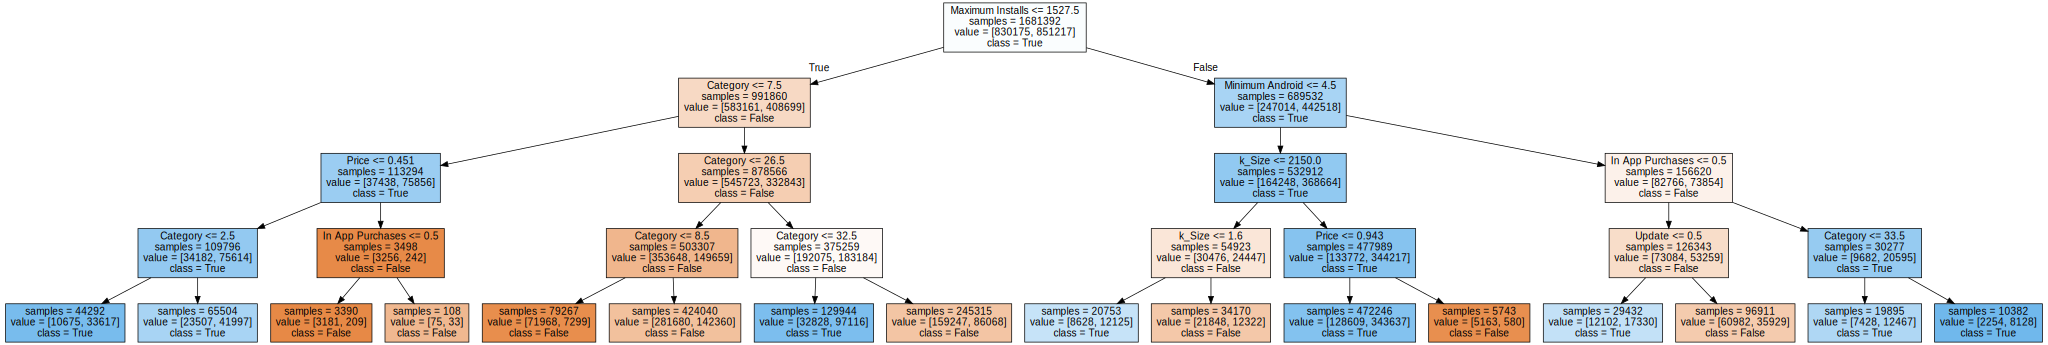

In [73]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "False", "True"],
                feature_names=gps.columns[2:18], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

##주요 변수들

In [74]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.47372437 0.         0.         0.         0.29764666 0.
 0.04894196 0.         0.08142284 0.         0.         0.02274979
 0.         0.01488811 0.06062627 0.        ]


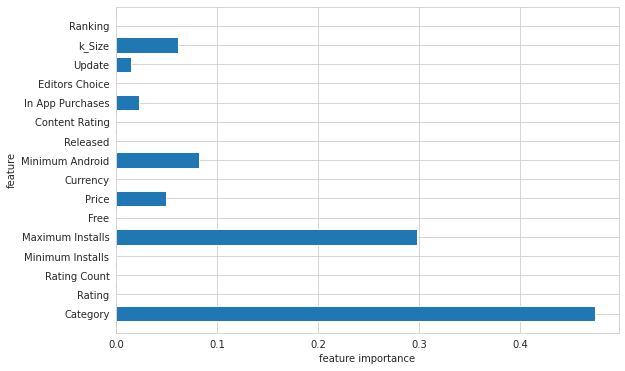

In [75]:
import numpy as np

def plot_feature_importances_gps(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(gps.columns[2:18])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), gps.columns[2:18])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_gps(tree)

In [76]:
res = pd.DataFrame(result)
res["feature"] = gps.columns[2:18]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='feature'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        16 non-null     float64
 1   feature  16 non-null     object 
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


None

,0,feature
0,0.473724,Category
10,0.000000,Content Rating
7,0.000000,Currency
12,0.000000,Editors Choice
5,0.000000,Free
11,0.022750,In App Purchases
4,0.297647,Maximum Installs
8,0.081423,Minimum Android
3,0.000000,Minimum Installs
6,0.048942,Price


##앙상블모델

### 랜덤포레스트

In [80]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import mglearn

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


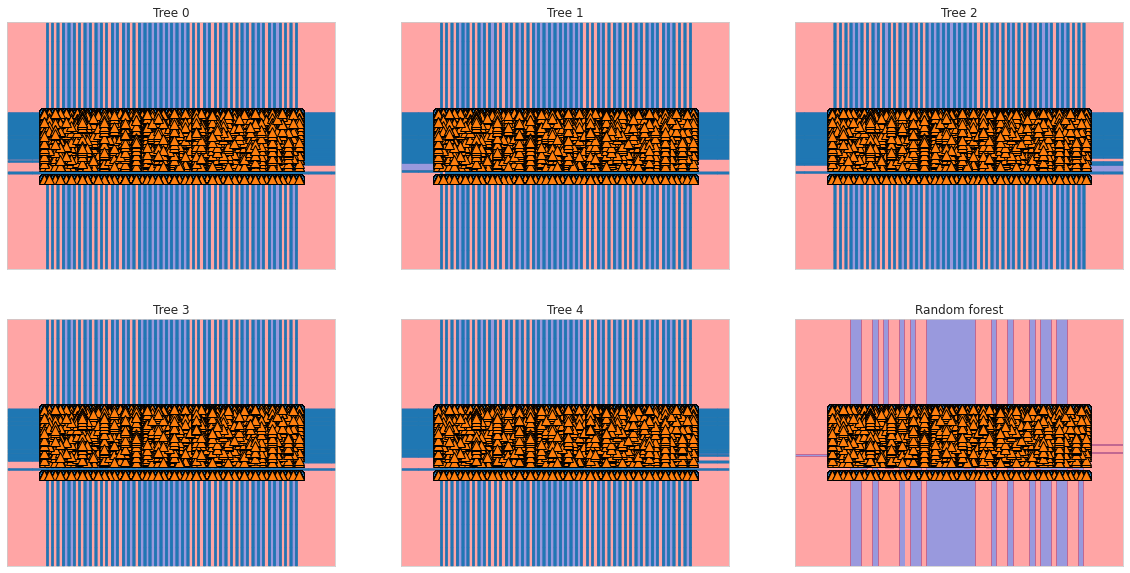

In [91]:
from sklearn.ensemble import RandomForestClassifier
import mglearn

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [92]:
#모든 변수 이용
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.995
시험용 데이터 세트 정확도: 0.789


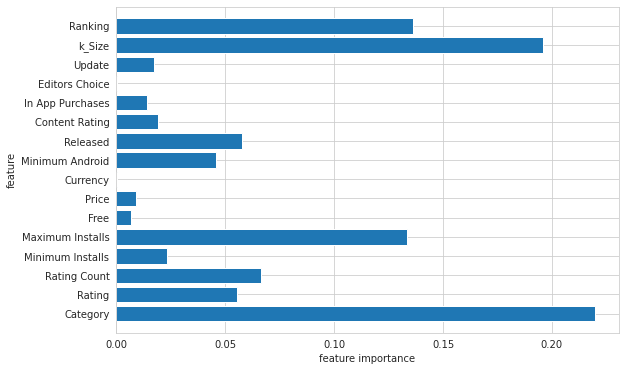

In [94]:
plot_feature_importances_gps(forest)

###그래디언트 부스팅

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [78]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.768
시험용 데이터 세트 정확도: 0.767


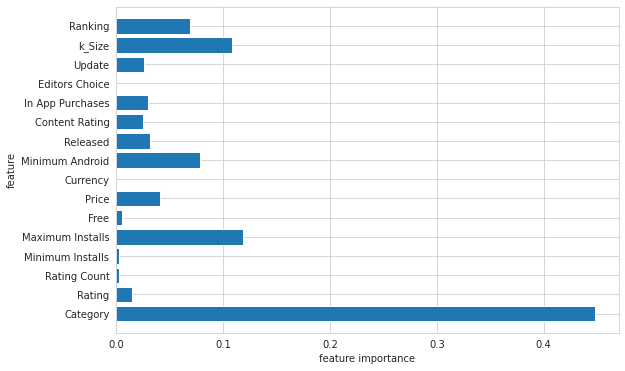

In [79]:
plot_feature_importances_gps(gbrt)